# Project Ref: PM-PR-0017 

# Client: No-Churn Telecom

# Category: Telecom – Churn Rate ML

## Business Case:
No-Churn Telecom is an established Telecom operator in Europe 
with more than a decade in Business. Due to new players in the 
market, telecom industry has become very competitive and 
retaining customers becoming a challenge. 
In spite of No-Churn initiatives of reducing tariffs and promoting 
more offers, the churn rate ( percentage of customers migrating to 
competitors) is well above 10%.
No-Churn wants to explore possibility of Machine Learning to help 
with following use cases to retain competitive edge in the industry

## PROJECT GOAL 
Help No-Churn with their use cases with ML
1. Understanding the variables that are influencing the customers 
to migrate.
2. Creating Churn risk scores that can be indicative to drive 
retention campaigns.
3. Introduce new predicting variable “CHURN-FLAG” with values 
YES(1) or NO(0) so that email campaigns with lucrative offers 
can be targeted to Churn YES customers.
help to identify possible CHURN-FLAG YES customers and provide 
more attention in customer touch point areas, including customer 
care support, request fulfilment, auto categorizing tickets as high 
priority for quick resolutions any questions they may have etc.,

## DATA 
- DataBase Details: 
- SQL database 
- DB Name: project_telecom
- Table Name: telecom_churn_data
- Host: 18.136.157.135
- Username: dm_team3
- Password: DM!$!Team!27@9!20&

## Meta Info of Data 
- State 4617 non-null object
- Account Length 4617 non-null int64
- Area Code 4617 non-null int64
- Phone 4617 non-null object
- International Plan 4617 non-null object
- VMail Plan 4617 non-null object
- VMail Message 4617 non-null int64
- Day Mins 4617 non-null float64
- Day Calls 4617 non-null int64
- Day Charge 4617 non-null float64
- Eve Mins 4617 non-null float64
- Eve Calls 4617 non-null int64
- Eve Charge 4617 non-null float64
- Night Mins 4617 non-null float64
- Night Calls 4617 non-null int64
- Night Charge 4617 non-null float64
- International Mins 4617 non-null float64
- International calls 4617 non-null int64
- International Charge 4617 non-null float64
- CustServ Calls 4617 non-null int64
- Churn 4617 non-null object

In [927]:
#importing' Libraries 
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [928]:
#connecting Database 
conn = mysql.connector.connect(
    host="18.136.157.135",
    user="dm_team3",
    password="DM!$!Team!27@9!20&",
    database="project_telecom",
    ssl_disabled=True
)


In [929]:
#import data table as df
query = "SELECT * FROM telecom_churn_data"
df = pd.read_sql(query, conn)


C:\Users\salma\AppData\Local\Temp\ipykernel_1652\3207715908.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [930]:
df

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


## Basic Checks

In [932]:
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [933]:
df.tail()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.8,...,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [934]:
df.shape

(4617, 21)

In [935]:
df.columns

Index(['columns1', 'columns2', 'columns3', 'columns4', 'columns5', 'columns6',
       'columns7', 'columns8', 'columns9', 'columns10', 'columns11',
       'columns12', 'columns13', 'columns14', 'columns15', 'columns16',
       'columns17', 'columns18', 'columns19', 'columns20', 'columns21'],
      dtype='object')

In [936]:
df.columns = [
    "State", "Account Length", "Area Code", "Phone Number", 
    "International Plan", "Voicemail Plan", "Voicemail Messages", 
    "Daytime Minutes", "Daytime Calls", "Daytime Charge", 
    "Evening Minutes", "Evening Calls", "Evening Charge", 
    "Night Minutes", "Night Calls", "Night Charge", 
    "Intl Minutes", "Intl Calls", "Intl Charge", 
    "Customer Service Calls", "Churn"
]

In [937]:
df.head()

,State,Account Length,Area Code,Phone Number,International Plan,Voicemail Plan,Voicemail Messages,Daytime Minutes,Daytime Calls,Daytime Charge,...,Evening Calls,Evening Charge,Night Minutes,Night Calls,Night Charge,Intl Minutes,Intl Calls,Intl Charge,Customer Service Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [938]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   4617 non-null   object
 1   Account Length          4617 non-null   object
 2   Area Code               4617 non-null   object
 3   Phone Number            4617 non-null   object
 4   International Plan      4617 non-null   object
 5   Voicemail Plan          4617 non-null   object
 6   Voicemail Messages      4617 non-null   object
 7   Daytime Minutes         4617 non-null   object
 8   Daytime Calls           4617 non-null   object
 9   Daytime Charge          4617 non-null   object
 10  Evening Minutes         4617 non-null   object
 11  Evening Calls           4617 non-null   object
 12  Evening Charge          4617 non-null   object
 13  Night Minutes           4617 non-null   object
 14  Night Calls             4617 non-null   object
 15  Nigh

In [939]:
df.isnull().sum()

State                     0
Account Length            0
Area Code                 0
Phone Number              0
International Plan        0
Voicemail Plan            0
Voicemail Messages        0
Daytime Minutes           0
Daytime Calls             0
Daytime Charge            0
Evening Minutes           0
Evening Calls             0
Evening Charge            0
Night Minutes             0
Night Calls               0
Night Charge              0
Intl Minutes              0
Intl Calls                0
Intl Charge               0
Customer Service Calls    0
Churn                     0
dtype: int64

## EDA

In [941]:
#drop column phone Number 
df.drop(columns=['Phone Number'], inplace=True)

In [942]:
df

,State,Account Length,Area Code,International Plan,Voicemail Plan,Voicemail Messages,Daytime Minutes,Daytime Calls,Daytime Charge,Evening Minutes,Evening Calls,Evening Charge,Night Minutes,Night Calls,Night Charge,Intl Minutes,Intl Calls,Intl Charge,Customer Service Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [943]:
print(df.dtypes)  # Check column data types


State                     object
Account Length            object
Area Code                 object
International Plan        object
Voicemail Plan            object
Voicemail Messages        object
Daytime Minutes           object
Daytime Calls             object
Daytime Charge            object
Evening Minutes           object
Evening Calls             object
Evening Charge            object
Night Minutes             object
Night Calls               object
Night Charge              object
Intl Minutes              object
Intl Calls                object
Intl Charge               object
Customer Service Calls    object
Churn                     object
dtype: object


In [944]:
print(df["State"].nunique())  # Count unique states
print(df["State"].unique())   # List unique state names


51
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


In [945]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["State","International Plan", "Voicemail Plan", "Churn"]


le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())


   State Account Length Area Code  International Plan  Voicemail Plan  \
0     16            128       415                   0               1   
1     35            107       415                   0               1   
2     31            137       415                   0               0   
3     35             84       408                   1               0   
4     36             75       415                   1               0   

  Voicemail Messages Daytime Minutes Daytime Calls Daytime Charge  \
0                 25           265.1           110          45.07   
1                 26           161.6           123          27.47   
2                  0           243.4           114          41.38   
3                  0           299.4            71           50.9   
4                  0           166.7           113          28.34   

  Evening Minutes Evening Calls Evening Charge Night Minutes Night Calls  \
0           197.4            99          16.78         244.7          

In [946]:
#Check all the rows is nummerical.
df


,State,Account Length,Area Code,International Plan,Voicemail Plan,Voicemail Messages,Daytime Minutes,Daytime Calls,Daytime Charge,Evening Minutes,Evening Calls,Evening Charge,Night Minutes,Night Calls,Night Charge,Intl Minutes,Intl Calls,Intl Charge,Customer Service Calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57,510,0,1,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,0
4613,32,177,408,0,1,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,0
4614,46,67,408,0,1,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,0
4615,22,98,415,0,1,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,0


In [947]:
df['State'].value_counts()

State
49    149
1     114
23    112
35    110
13    110
45    109
34    109
37    107
31    106
50    106
43    105
44    104
48     99
22     98
19     97
16     96
46     95
21     95
6      92
20     92
26     92
25     91
30     91
5      91
17     90
39     90
33     89
15     89
8      89
47     89
9      85
32     84
24     84
40     83
27     83
42     83
7      82
3      81
28     80
36     80
11     79
29     79
14     79
2      77
10     77
41     76
18     73
0      69
38     68
12     65
4      44
Name: count, dtype: int64

In [948]:
print(df["State"].nunique())  # Count unique states
print(df["State"].unique())   # List unique state names


51
[16 35 31 36  1 19 24 18 49 15 39 12 26 34 13 46 45 43  9  5  3 40 29 50
 11 14 30 10  0 20  2 48 37 22  8 44  4 23 41 27 47 32 33  7 17 21 25 42
 38  6 28]


In [949]:
df['Churn'].value_counts()
#3961 Users were no Churn and 656 telecoms customers were Churned

Churn
0    3961
1     656
Name: count, dtype: int64

In [950]:
#sweetviz Reports of columns and thier data content.
import sweetviz as sv
report = sv.analyze(df)
report.show_html("sweetviz_report.html")


                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


- 51 distinctive values represents state
- Area code represent 3 the 50 % of the code is 415
- 90% of telecom user were not used international plans
- only 27% of users is used voicemail plan
- No churn customers was around 86% and only 14 of users where churned

In [952]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   4617 non-null   int32 
 1   Account Length          4617 non-null   object
 2   Area Code               4617 non-null   object
 3   International Plan      4617 non-null   int32 
 4   Voicemail Plan          4617 non-null   int32 
 5   Voicemail Messages      4617 non-null   object
 6   Daytime Minutes         4617 non-null   object
 7   Daytime Calls           4617 non-null   object
 8   Daytime Charge          4617 non-null   object
 9   Evening Minutes         4617 non-null   object
 10  Evening Calls           4617 non-null   object
 11  Evening Charge          4617 non-null   object
 12  Night Minutes           4617 non-null   object
 13  Night Calls             4617 non-null   object
 14  Night Charge            4617 non-null   object
 15  Intl

In [953]:
#convert columns into numerical.
cols_to_convert = [
    'Account Length', 'Area Code', 'Voicemail Messages', 
    'Daytime Minutes', 'Daytime Calls', 'Daytime Charge', 
    'Evening Minutes', 'Evening Calls', 'Evening Charge', 
    'Night Minutes', 'Night Calls', 'Night Charge', 
    'Intl Minutes', 'Intl Calls', 'Intl Charge', 
    'Customer Service Calls'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, set errors to NaN if any issue

# Verify data types
print(df.dtypes)


State                       int32
Account Length              int64
Area Code                   int64
International Plan          int32
Voicemail Plan              int32
Voicemail Messages          int64
Daytime Minutes           float64
Daytime Calls               int64
Daytime Charge            float64
Evening Minutes           float64
Evening Calls               int64
Evening Charge            float64
Night Minutes             float64
Night Calls                 int64
Night Charge              float64
Intl Minutes              float64
Intl Calls                  int64
Intl Charge               float64
Customer Service Calls      int64
Churn                       int32
dtype: object


In [954]:
print(df.isnull().sum())  # Check if any NaN values appeared after conversion


State                     0
Account Length            0
Area Code                 0
International Plan        0
Voicemail Plan            0
Voicemail Messages        0
Daytime Minutes           0
Daytime Calls             0
Daytime Charge            0
Evening Minutes           0
Evening Calls             0
Evening Charge            0
Night Minutes             0
Night Calls               0
Night Charge              0
Intl Minutes              0
Intl Calls                0
Intl Charge               0
Customer Service Calls    0
Churn                     0
dtype: int64


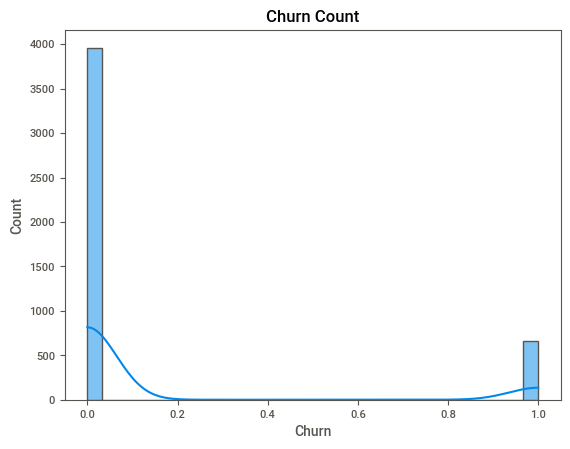

In [955]:
#the majority data was no Churn customers.
sns.histplot(df['Churn'],bins=30, kde=True)
plt.title("Churn Count")
plt.show()

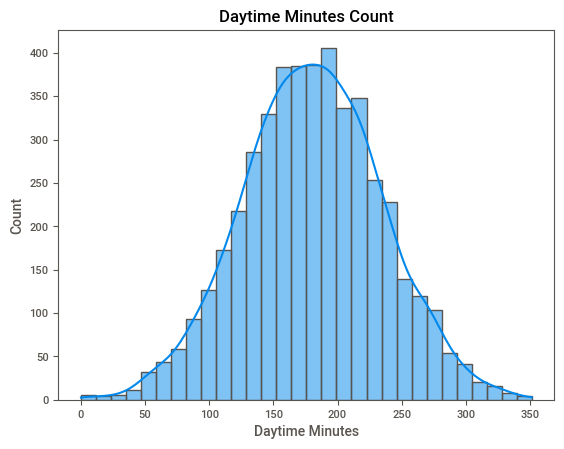

In [956]:

sns.histplot(df['Daytime Minutes'],bins=30, kde=True)
plt.title("Daytime Minutes Count")
plt.show()

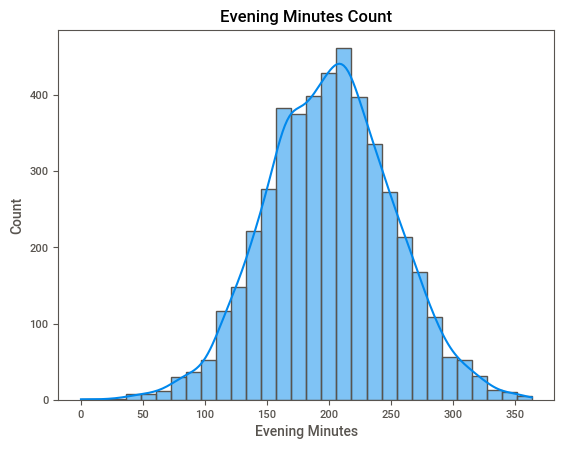

In [957]:

sns.histplot(df['Evening Minutes'],bins=30, kde=True)
plt.title("Evening Minutes Count")
plt.show()

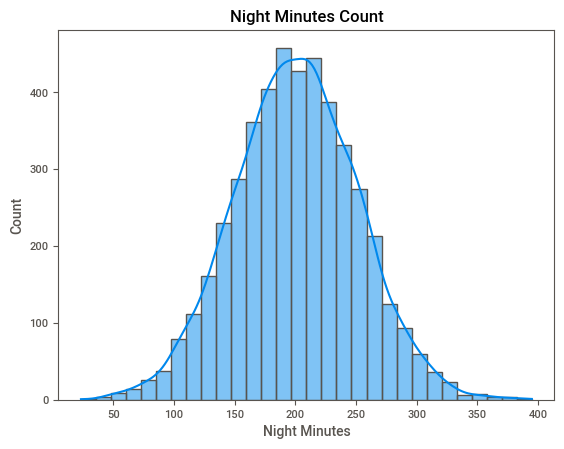

In [958]:

sns.histplot(df['Night Minutes'],bins=30, kde=True)
plt.title("Night Minutes Count")
plt.show()

<Axes: >

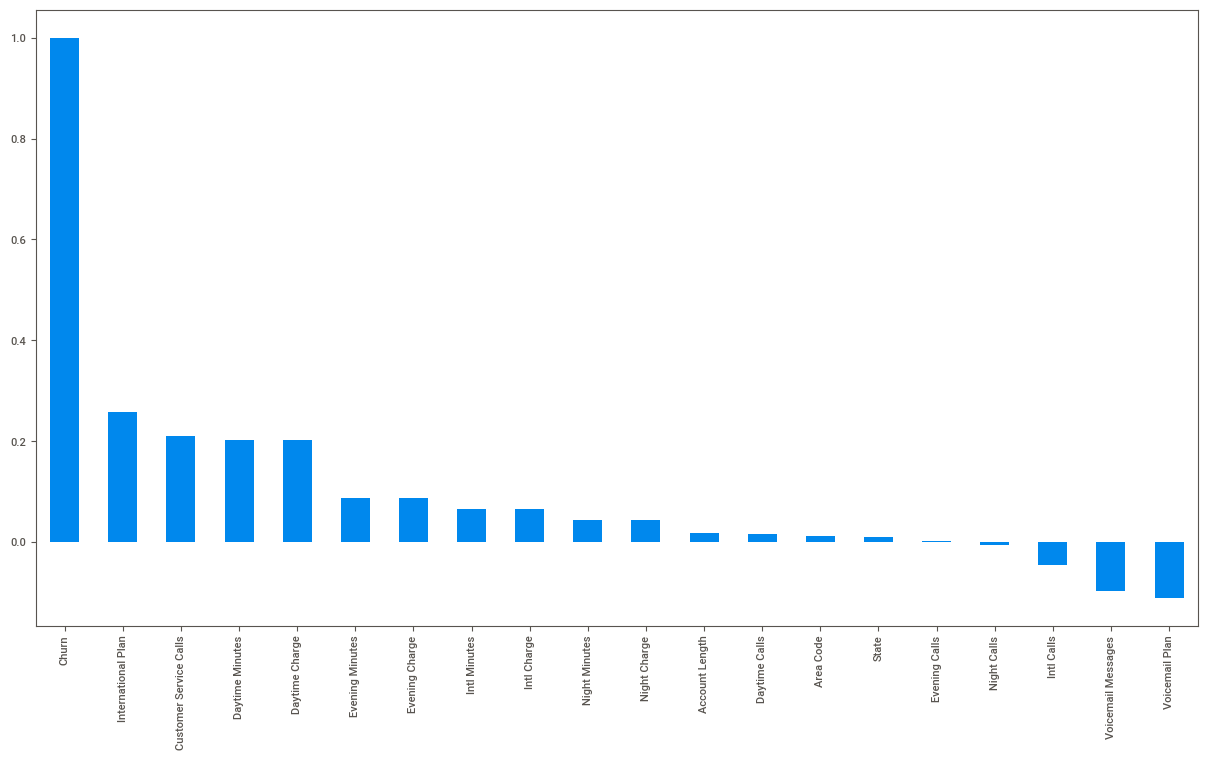

In [959]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

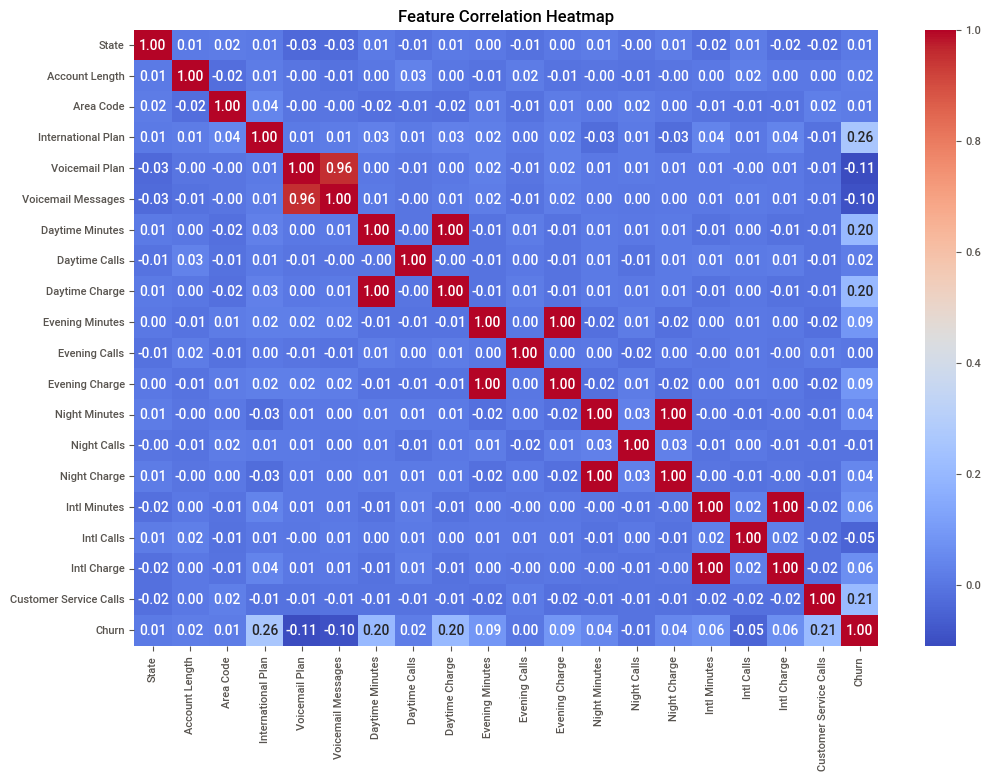

In [960]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap to visualize correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [961]:
# Drop columns with perfect correlation
columns_to_drop = ['Voicemail Messages','Daytime Charge', 'Evening Charge', 'Night Charge', 'Intl Charge']
df.drop(columns=columns_to_drop, inplace=True)

# Verify the updated DataFrame
print("Updated columns:", df.columns)


Updated columns: Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'Voicemail Plan', 'Daytime Minutes', 'Daytime Calls', 'Evening Minutes',
       'Evening Calls', 'Night Minutes', 'Night Calls', 'Intl Minutes',
       'Intl Calls', 'Customer Service Calls', 'Churn'],
      dtype='object')


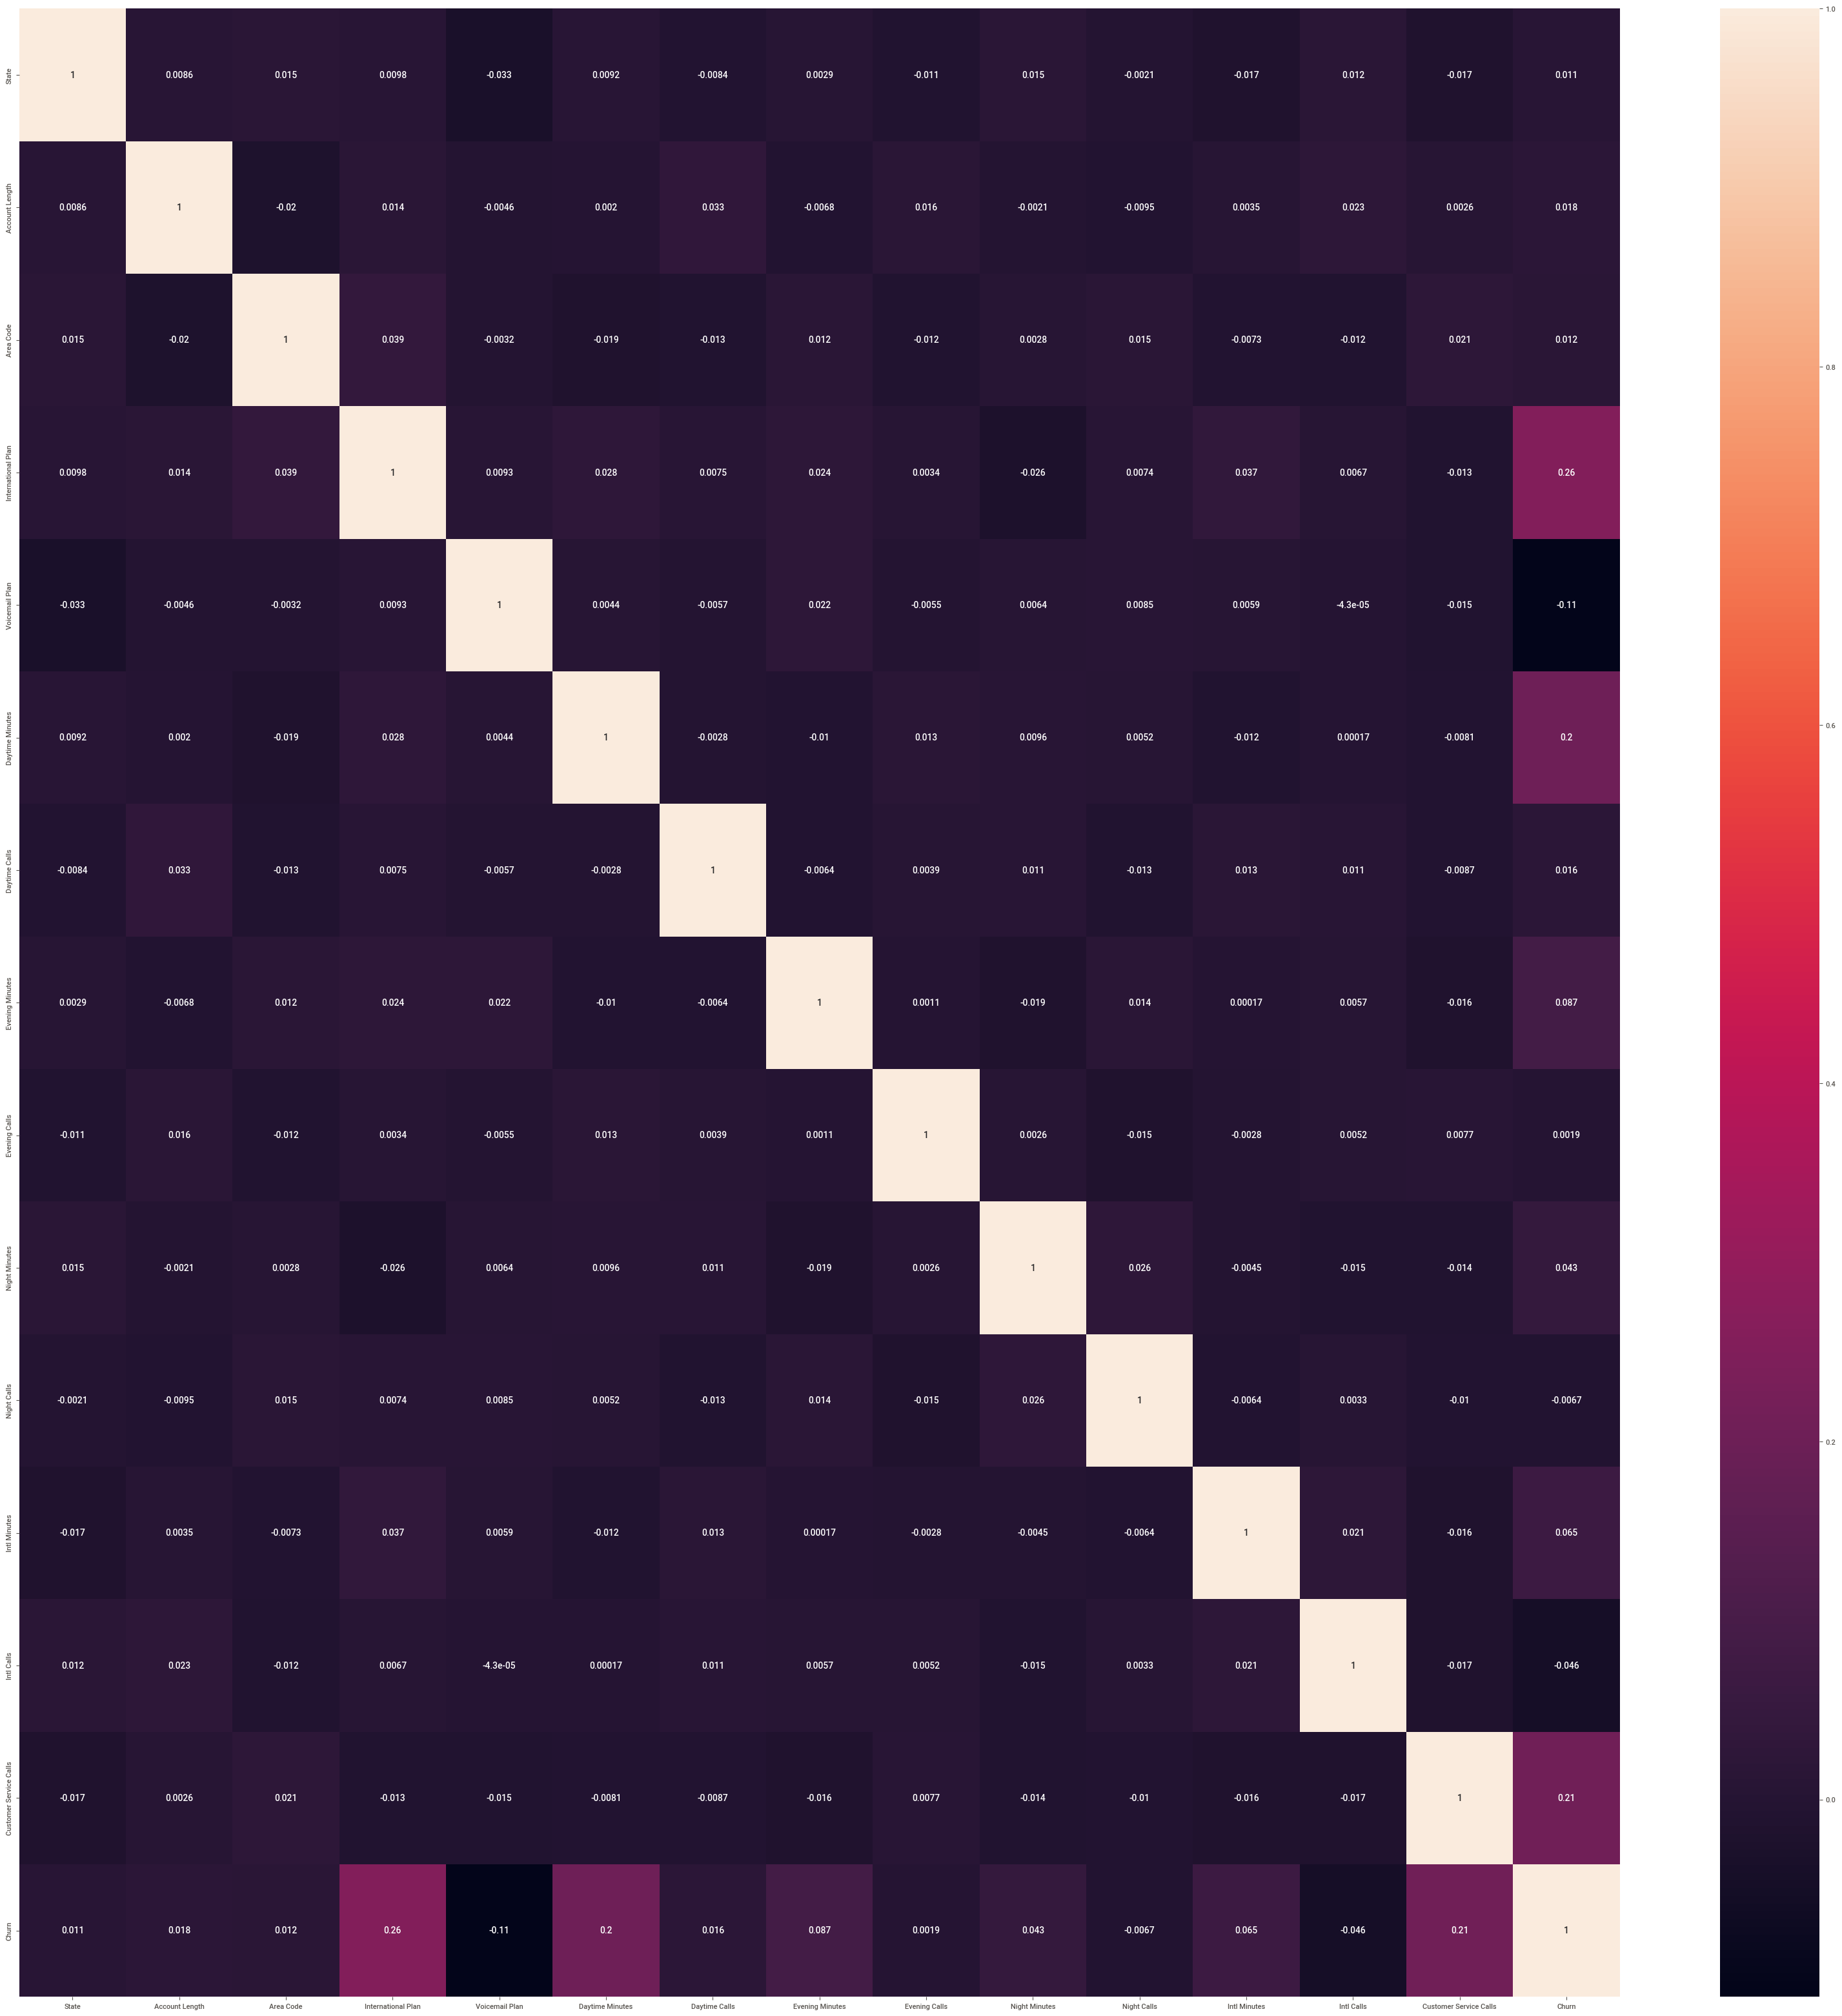

In [962]:
#correlation Metrix without higly correlated columns. 
plt.figure(figsize=(40,40))
correlation_matrix=df.corr()
sns.heatmap((correlation_matrix),annot=True)
plt.show()

In [963]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [964]:
#15columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   4617 non-null   int32  
 1   Account Length          4617 non-null   int64  
 2   Area Code               4617 non-null   int64  
 3   International Plan      4617 non-null   int32  
 4   Voicemail Plan          4617 non-null   int32  
 5   Daytime Minutes         4617 non-null   float64
 6   Daytime Calls           4617 non-null   int64  
 7   Evening Minutes         4617 non-null   float64
 8   Evening Calls           4617 non-null   int64  
 9   Night Minutes           4617 non-null   float64
 10  Night Calls             4617 non-null   int64  
 11  Intl Minutes            4617 non-null   float64
 12  Intl Calls              4617 non-null   int64  
 13  Customer Service Calls  4617 non-null   int64  
 14  Churn                   4617 non-null   

## Train Test Split Data

In [966]:
# X includes the all coolumns exclde class
X=df.drop(columns=['Churn'],axis=1)
# y includes only class column 
y=df['Churn']

In [967]:
X.shape,y.shape

((4617, 14), (4617,))

In [968]:
X.head()

,State,Account Length,Area Code,International Plan,Voicemail Plan,Daytime Minutes,Daytime Calls,Evening Minutes,Evening Calls,Night Minutes,Night Calls,Intl Minutes,Intl Calls,Customer Service Calls
0,16,128,415,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1
1,35,107,415,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1
2,31,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,35,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,36,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3


In [969]:
y.value_counts()

Churn
0    3961
1     656
Name: count, dtype: int64

In [970]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=3)

In [971]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3693, 14), (924, 14), (3693,), (924,))

In [972]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


## ML Modeling

In [974]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

## 1-Decision Tree Classifier

In [976]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=55)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=55)

In [977]:
y_pred=dt.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [978]:
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest:")
print(accuracy)

Random Forest:
0.9123376623376623


In [979]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       793
           1       0.71      0.64      0.67       131

    accuracy                           0.91       924
   macro avg       0.83      0.80      0.81       924
weighted avg       0.91      0.91      0.91       924



<Axes: >

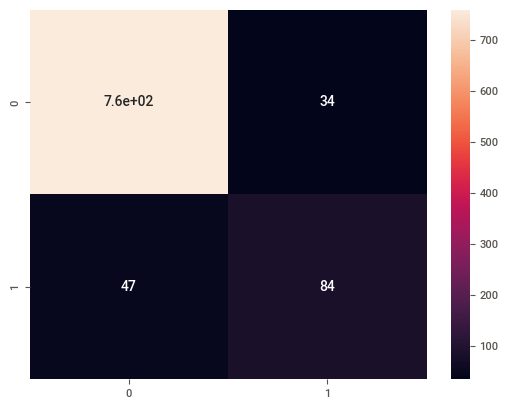

In [980]:
from sklearn.metrics import confusion_matrix
dt_cm=confusion_matrix(y_test,y_pred)
sns.heatmap(dt_cm,annot=True)

- Excellent performance on non-churn predictions (Class 0), with high precision and recall.
- Overall high accuracy.
- Lower performance for churn predictions (Class 1).
- The recall for churn is 0.64, meaning many actual churn cases are being missed, which could be critical depending on the use case.

## 2-Random Forest Classifier

In [983]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest:")
print(accuracy)

Random Forest:
0.9458874458874459


In [984]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       793
           1       0.96      0.65      0.77       131

    accuracy                           0.95       924
   macro avg       0.95      0.82      0.87       924
weighted avg       0.95      0.95      0.94       924



<Axes: >

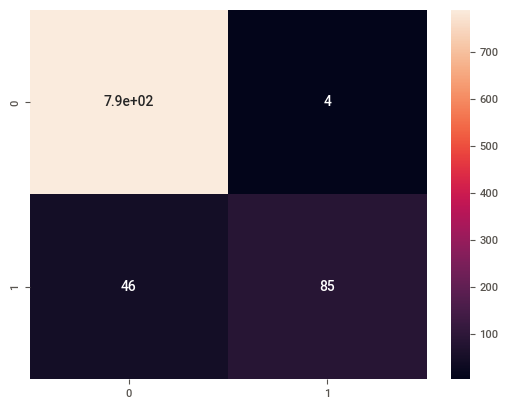

In [985]:
from sklearn.metrics import confusion_matrix
rf_cm=confusion_matrix(y_test,y_pred)
sns.heatmap(rf_cm,annot=True)

- Higher Accuracy: Improved from 91.23% to 94.26%.
- Better Precision for Class 1 (Churn): Increased from 0.71 to 0.93.
- Fewer False Negatives: The number of churn cases misclassified as non-churn reduced significantly (from a large count in the previous confusion matrix to 6).

## 3-Support Vector Classifier

In [988]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.8582251082251082


In [989]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       793
           1       0.00      0.00      0.00       131

    accuracy                           0.86       924
   macro avg       0.43      0.50      0.46       924
weighted avg       0.74      0.86      0.79       924



C:\Users\salma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\salma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\salma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 4-K Nearest Neighbors Classifier

In [991]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.8658008658008658


In [992]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       793
           1       0.57      0.21      0.30       131

    accuracy                           0.87       924
   macro avg       0.73      0.59      0.61       924
weighted avg       0.84      0.87      0.84       924



## 5-GaussianNB

In [994]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)
score=accuracy_score(y_test,y_pred)
print("the accuracy score is ",score)

the accuracy score is  0.8528138528138528


In [995]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       793
           1       0.48      0.44      0.46       131

    accuracy                           0.85       924
   macro avg       0.69      0.68      0.69       924
weighted avg       0.85      0.85      0.85       924



## 6-XGBClassifier

In [997]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score=accuracy_score(y_test, y_pred)
print(score)

0.9437229437229437


In [998]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       793
           1       0.90      0.68      0.77       131

    accuracy                           0.94       924
   macro avg       0.92      0.83      0.87       924
weighted avg       0.94      0.94      0.94       924



<Axes: >

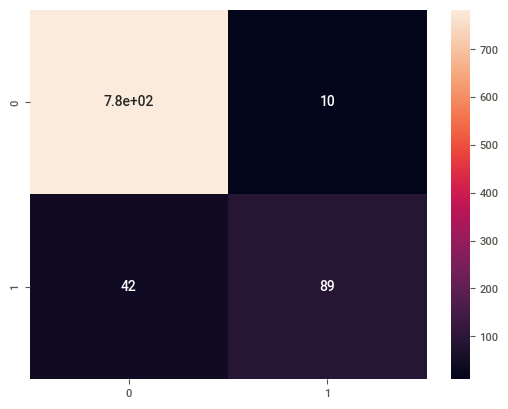

In [1004]:
from sklearn.metrics import confusion_matrix
xgb_cm=confusion_matrix(y_test,y_pred)
sns.heatmap(xgb_cm,annot=True)

In [1006]:
print(type(model))


<class 'xgboost.sklearn.XGBClassifier'>


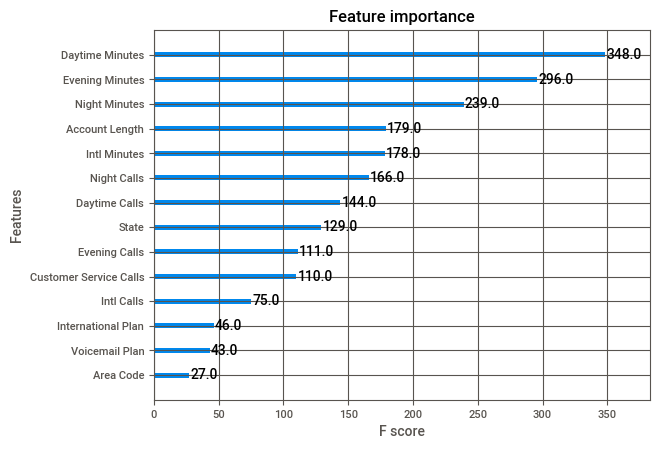

In [1008]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model)  # Assuming `booster_model` is an xgboost.Booster instance
plt.show()


In [1012]:
models = {
    '\nDecision Tree':DecisionTreeClassifier(),
    '\nRandom Forest': RandomForestClassifier(),
    '\nSupport Vector Machine':SVC(),
    '\nK-Nearest Neighbors':KNeighborsClassifier(),
    '\nGaussian NB':GaussianNB(),
    '\nXGB Classifier':XGBClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    print(f'{name} Report:')
    print(classification_report(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       793
           1       0.73      0.65      0.69       131

    accuracy                           0.92       924
   macro avg       0.83      0.80      0.82       924
weighted avg       0.91      0.92      0.91       924

Accuracy: 0.9155844155844156
Confusion Matrix:
[[761  32]
 [ 46  85]]

Random Forest Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       793
           1       0.95      0.66      0.78       131

    accuracy                           0.95       924
   macro avg       0.95      0.83      0.88       924
weighted avg       0.95      0.95      0.94       924

Accuracy: 0.946969696969697
Confusion Matrix:
[[788   5]
 [ 44  87]]

Support Vector Machine Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       793
           1       0

C:\Users\salma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\salma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\salma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



XGB Classifier Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       793
           1       0.90      0.68      0.77       131

    accuracy                           0.94       924
   macro avg       0.92      0.83      0.87       924
weighted avg       0.94      0.94      0.94       924

Accuracy: 0.9437229437229437
Confusion Matrix:
[[783  10]
 [ 42  89]]


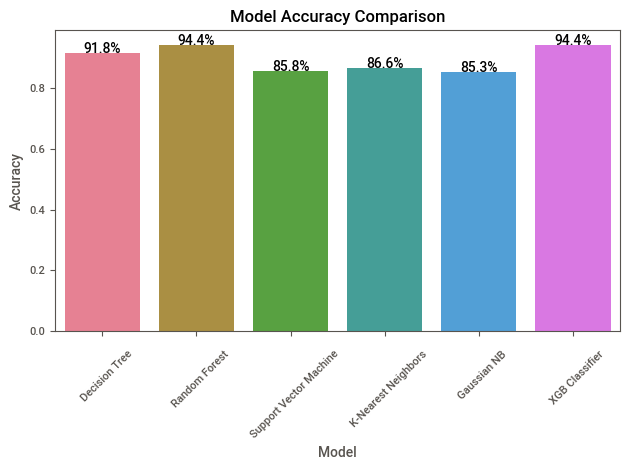

In [1016]:
# Collect accuracy results
accuracy_df = pd.DataFrame([{"Model": name, "Accuracy": accuracy_score(y_test, model.fit(X_train, y_train).predict(X_test))} 
                            for name, model in models.items()])

# Plot accuracy with percentage labels
sns.barplot(x="Model", y="Accuracy", data=accuracy_df, hue="Model", palette="husl", legend=False)

plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)

# Add percentage labels
for bar in plt.gca().patches:
    plt.gca().annotate(f'{bar.get_height() * 100:.1f}%', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center')

plt.tight_layout()
plt.show()

- If minimizing false negatives (missing actual claims) is crucial, go with XGBoost.
- If minimizing false positives (wrong claim detection) is more important, choose Random Forest.

Since both models perform closely, you could tune hyperparameters further or consider ensemble techniques to improve results.
